# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | guarapari
Processing Record 4 of Set 1 | santa luzia
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | lubang
Processing Record 9 of Set 1 | feicheng
Processing Record 10 of Set 1 | northam
Processing Record 11 of Set 1 | taradale
Processing Record 12 of Set 1 | elko
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | wanganui
Processing Record 17 of Set 1 | ust'-ilimsk
Processing Record 18 of Set 1 | ichinoseki
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | nykarleby
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | georgetow

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,288.22,85,78,2.43,AU,1733478999
1,grytviken,-54.2811,-36.5092,272.99,67,93,3.35,GS,1733478999
2,guarapari,-20.6667,-40.4975,296.45,73,19,3.98,BR,1733478999
3,santa luzia,-19.7697,-43.8514,295.65,60,0,2.06,BR,1733478999
4,waitangi,-43.9535,-176.5597,284.16,92,67,1.79,NZ,1733478999


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

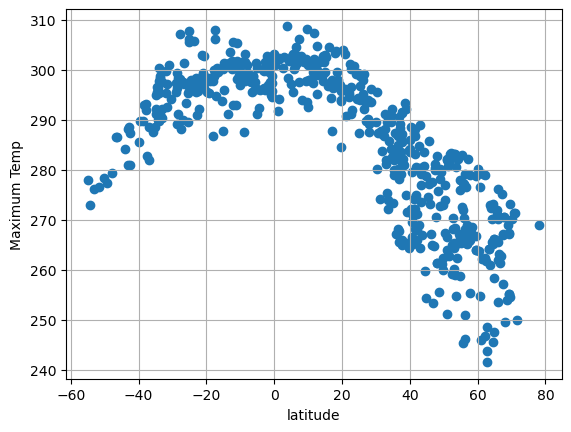

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.xlabel("latitude")
plt.ylabel("Maximum Temp")
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

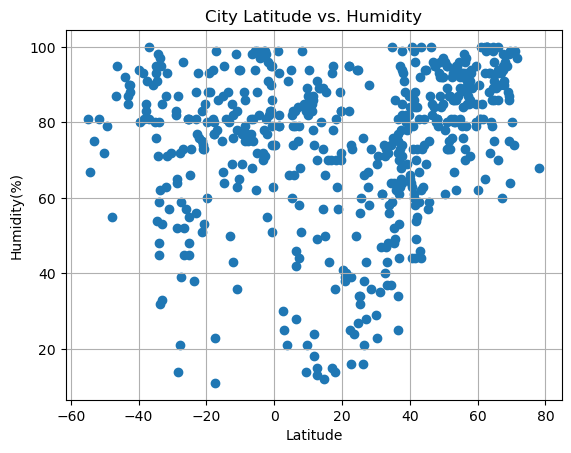

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs. Humidity")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

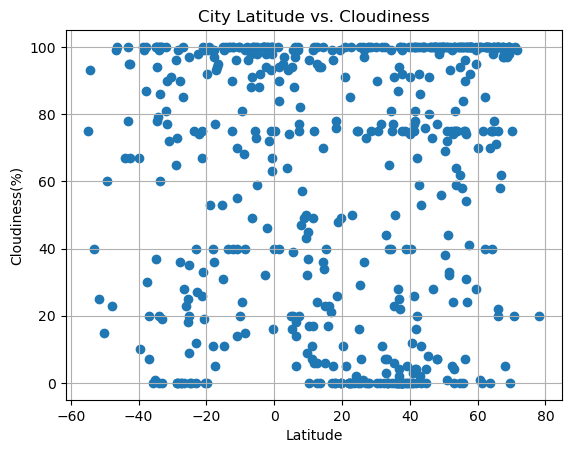

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

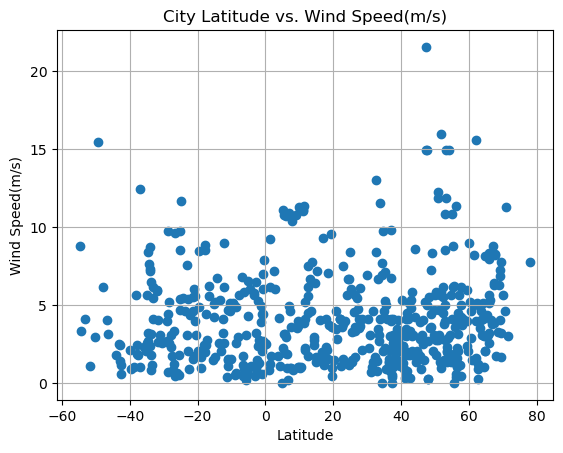

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title("City Latitude vs. Wind Speed(m/s)")
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x,y,x_lab,y_lab):
    x_values = np.array(x)
    y_values = np.array(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0.05, 0.95), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f"{x_lab} vs {y_lab}")
    print(f'The r^2-value is : {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,bethel,41.3712,-73.4140,272.20,61,100,3.09,US,1733479000
7,lubang,13.8584,120.1240,302.09,80,94,7.73,PH,1733479000
8,feicheng,35.2606,117.9675,279.95,52,6,2.21,CN,1733479000
9,northam,51.0333,-4.2167,282.09,73,72,2.77,GB,1733479000
11,elko,41.0002,-115.5012,270.73,73,3,0.89,US,1733479000


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,288.22,85,78,2.43,AU,1733478999
1,grytviken,-54.2811,-36.5092,272.99,67,93,3.35,GS,1733478999
2,guarapari,-20.6667,-40.4975,296.45,73,19,3.98,BR,1733478999
3,santa luzia,-19.7697,-43.8514,295.65,60,0,2.06,BR,1733478999
4,waitangi,-43.9535,-176.5597,284.16,92,67,1.79,NZ,1733478999


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is : 0.7308967197288428


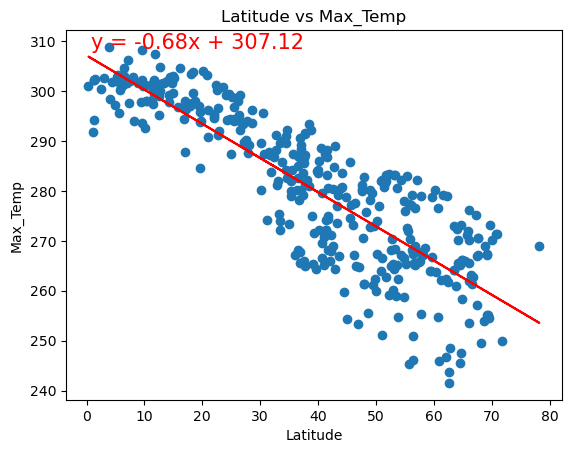

In [31]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Latitude','Max_Temp')

The r^2-value is : 0.4041295371041589


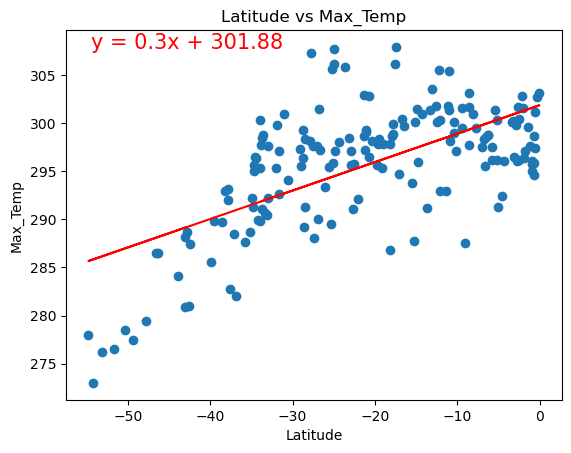

In [38]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max_Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is : 0.19385050956577565


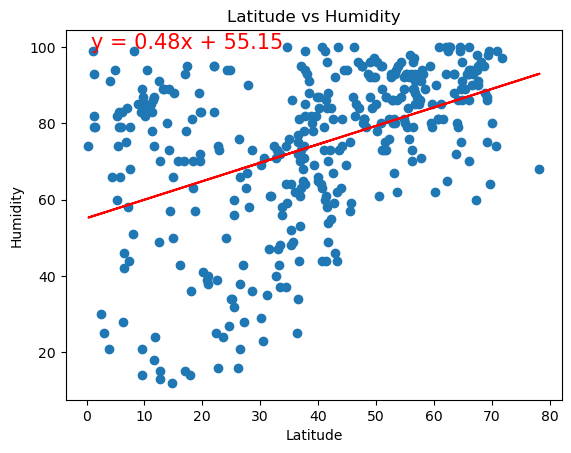

In [39]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity')

The r^2-value is : 0.006306903185084717


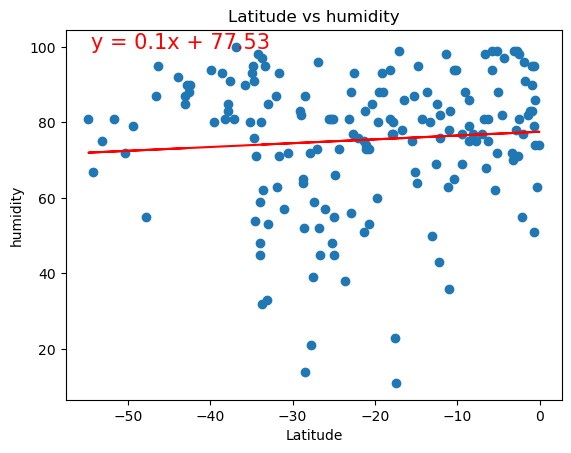

In [40]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is : 0.0683804336541057


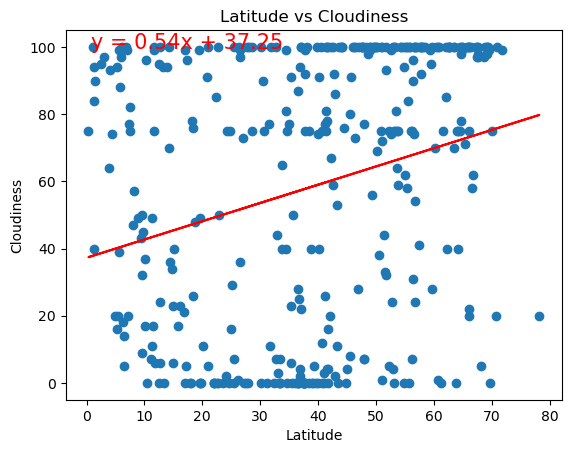

In [37]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r^2-value is : 0.03884734589361807


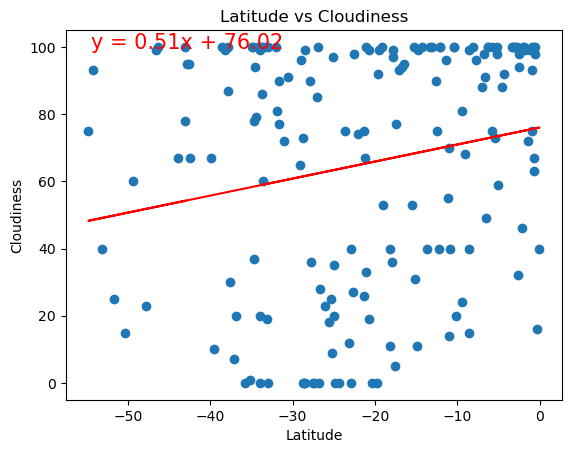

In [41]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is : 0.0031944569921070107


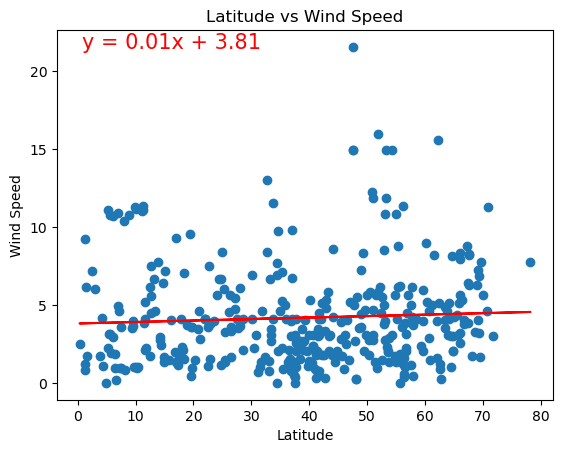

In [42]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r^2-value is : 0.009633533560503723


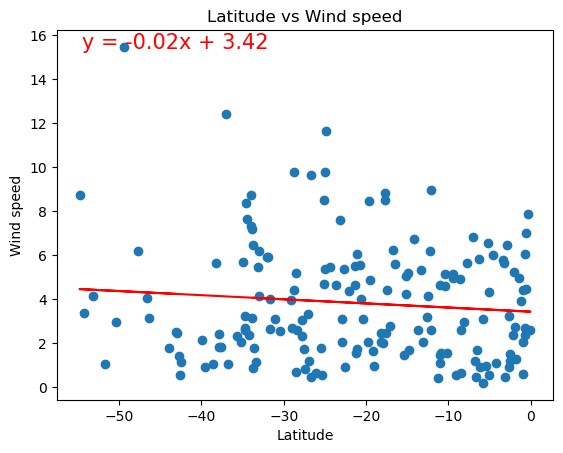

In [43]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE